In [ ]:
# The dataset contains the following fields:

# key - a unique identifier for each trip
# fare_amount - the cost of each trip in usd
# pickup_datetime - date and time when the meter was engaged
# passenger_count - the number of passengers in the vehicle (driver entered value)
# pickup_longitude - the longitude where the meter was engaged
# pickup_latitude - the latitude where the meter was engaged
# dropoff_longitude - the longitude where the meter was disengaged
# dropoff_latitude - the latitude where the meter was disengaged

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/uber.csv")

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [6]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df = df.drop(columns = ['key'])

In [7]:
df.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44647 entries, 0 to 44646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 44647 non-null  int64  
 1   fare_amount        44647 non-null  float64
 2   pickup_datetime    44647 non-null  object 
 3   pickup_longitude   44646 non-null  float64
 4   pickup_latitude    44646 non-null  float64
 5   dropoff_longitude  44646 non-null  float64
 6   dropoff_latitude   44646 non-null  float64
 7   passenger_count    44646 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64


In [10]:
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
44646,42187851,8.5,2,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna()
print(df.isnull().sum())

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [13]:
df['pickup_datetime'].head()


,pickup_datetime
0,2015-05-07 19:52:06+00:00
1,2009-07-17 20:04:56+00:00
2,2009-08-24 21:45:00+00:00
3,2009-06-26 08:22:21+00:00
4,2014-08-28 17:47:00+00:00


**Distance column creation**

As we latitude and longitude and did'nt have the distance column, so let's create one from it. we will use the haversine method.

In [14]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [15]:
df.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475450


In [16]:
df.describe()


,Id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,4.464600e+04,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000
mean,2.769153e+07,11.400171,-72.566735,39.951296,-72.587712,39.955902,1.678627,20.924690
std,1.603611e+07,10.081187,10.756469,5.995164,10.667100,5.980302,1.295952,382.508801
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000,0.000000
25%,1.374844e+07,6.000000,-73.992111,40.734764,-73.991485,40.733700,1.000000,1.221360
50%,2.765892e+07,8.500000,-73.981854,40.752527,-73.980132,40.752906,1.000000,2.127324
75%,4.153255e+07,12.500000,-73.967164,40.767136,-73.963706,40.768169,2.000000,3.888564
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000,8776.106279


There are significant outliers in fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and passenger_count. For example the minimum fare_amount is -52 (clearly an outlier) and max is 499(too high, an outlier).

<Axes: title={'center': 'distance in km'}, xlabel='distance_km'>

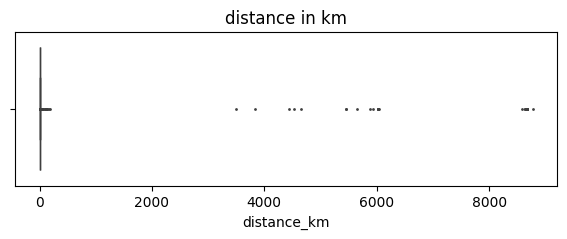

In [17]:
plt.figure(figsize=(7,2))
plt.title('distance in km')
sns.boxplot(data=df, x='distance_km', fliersize=1)

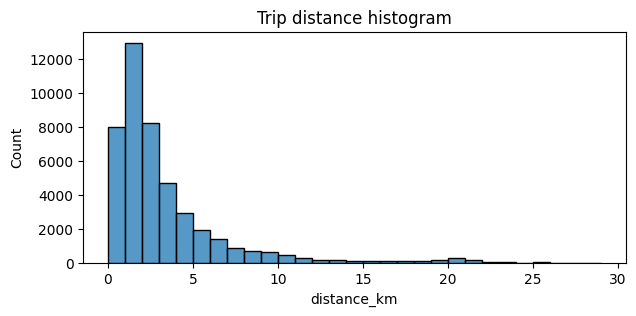

In [18]:
plt.figure(figsize=(7,3))
sns.histplot(df['distance_km'], bins=range(0,30,1))
plt.title('Trip distance histogram');

<Axes: title={'center': 'fare amount'}, xlabel='fare_amount'>

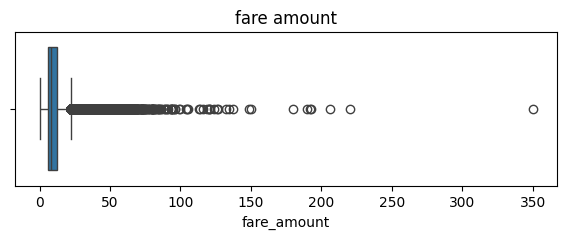

In [19]:
plt.figure(figsize=(7,2))
plt.title('fare amount')
sns.boxplot(data=df, x='fare_amount')

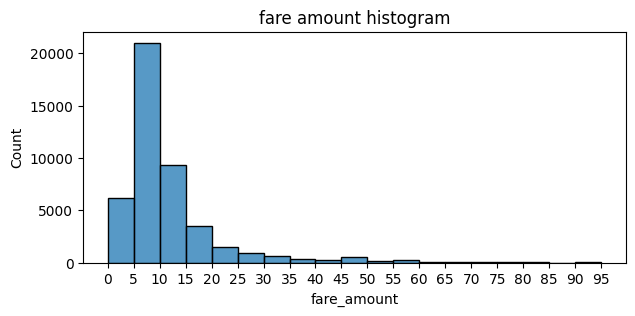

In [20]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['fare_amount'],bins=range(0,100,5))
ax.set_xticks(range(0,100,5))
ax.set_xticklabels(range(0,100,5))
plt.title('fare amount histogram');


<Axes: title={'center': 'passenger count'}, xlabel='passenger_count'>

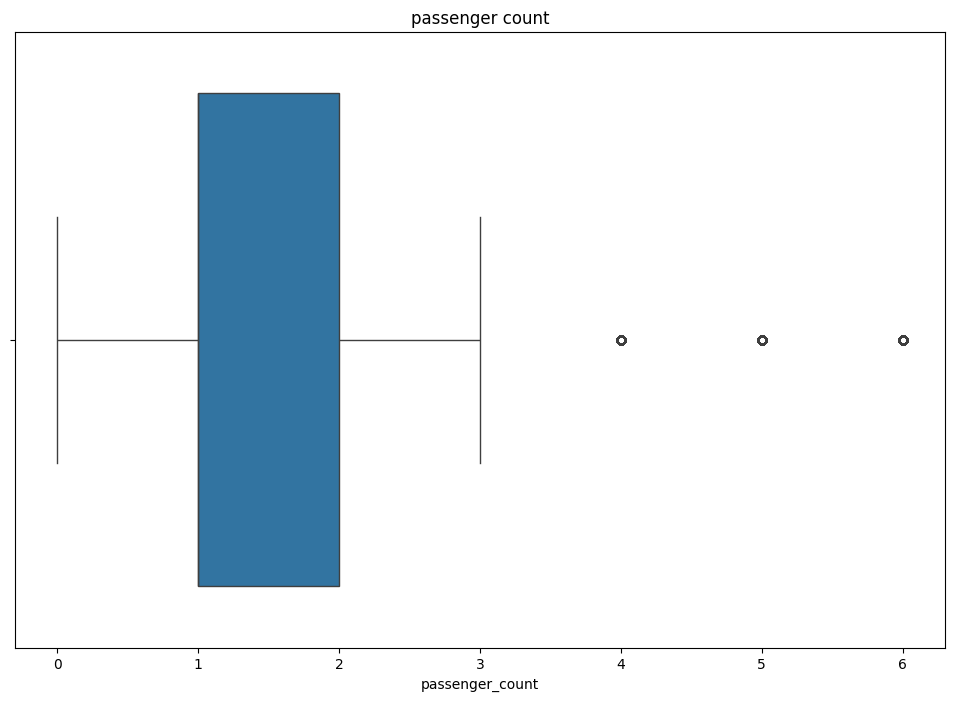

In [21]:
plt.figure(figsize=(12,8))
plt.title('passenger count')
sns.boxplot(data=df, x='passenger_count')

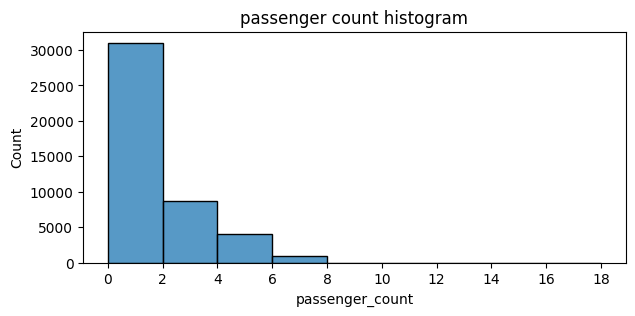

In [22]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['passenger_count'],bins=range(0,20,2))
ax.set_xticks(range(0,20,2))
ax.set_xticklabels(range(0,20,2))
plt.title('passenger count histogram');

In [23]:
df['passenger_count'].value_counts()


,count
passenger_count,
1.0,30881
2.0,6638
5.0,3113
3.0,2046
4.0,924
6.0,898
0.0,146


In [24]:
mean_fares_by_passenger_count = df.groupby(['passenger_count']).mean()[['fare_amount']]
mean_fares_by_passenger_count

,fare_amount
passenger_count,
0.0,9.856164
1.0,11.302371
2.0,11.796193
3.0,11.622678
4.0,11.891050
5.0,10.970196
6.0,12.565523


In [25]:
# Create a month column
df['month'] = df['pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['pickup_datetime'].dt.day_name()

In [26]:
monthly_rides = df['month'].value_counts()
monthly_rides

,count
month,
April,4222
May,4204
March,4179
June,4000
January,3941
February,3793
October,3658
September,3441
November,3391


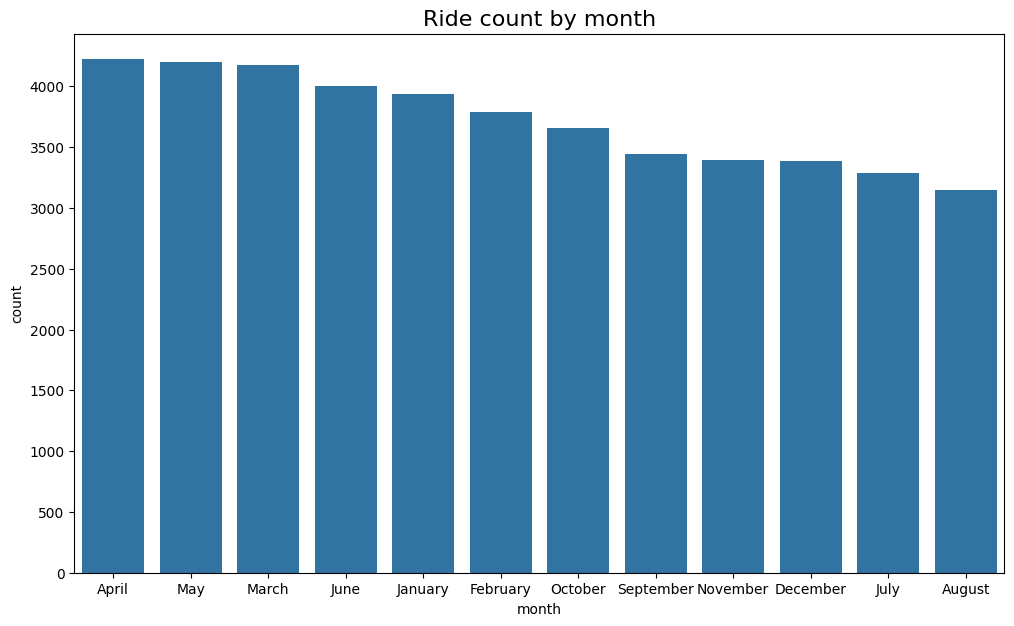

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(monthly_rides)

plt.title('Ride count by month', fontsize=16);

In [28]:
daily_rides = df['day'].value_counts()
daily_rides

,count
day,
Friday,6804
Saturday,6789
Thursday,6633
Wednesday,6596
Tuesday,6356
Sunday,5947
Monday,5521


<Axes: xlabel='day', ylabel='count'>

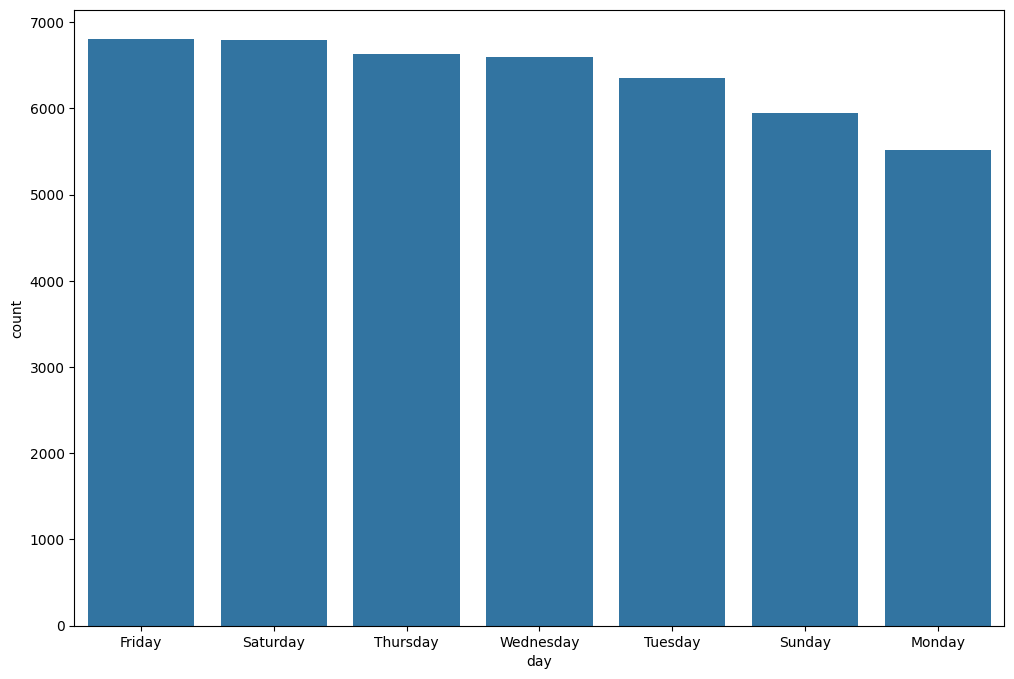

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(daily_rides)

In [30]:
df_without_date = df.drop(columns=['pickup_datetime'])


In [31]:
total_amount_per_day = df_without_date.groupby(by='day').sum()[['fare_amount']]
total_amount_per_day

,fare_amount
day,
Friday,78152.46
Monday,63327.31
Saturday,74943.55
Sunday,69834.54
Thursday,76684.08
Tuesday,70489.31
Wednesday,75540.80


Text(0, 0.5, 'Total Fare Amount')

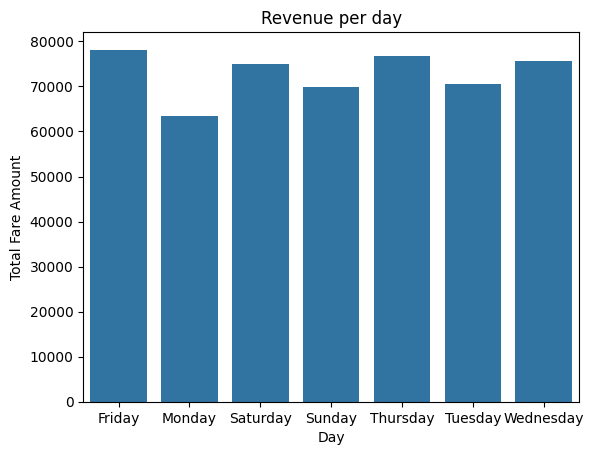

In [32]:
total_amount_per_day = total_amount_per_day
sns.barplot(x='day', y='fare_amount', data=total_amount_per_day)
plt.title('Revenue per day')
plt.xlabel('Day')
plt.ylabel('Total Fare Amount')


In [33]:
total_amount_per_month = df_without_date.groupby(by='month').sum()[['fare_amount']]

Text(0.5, 1.0, 'Revenue by Month')

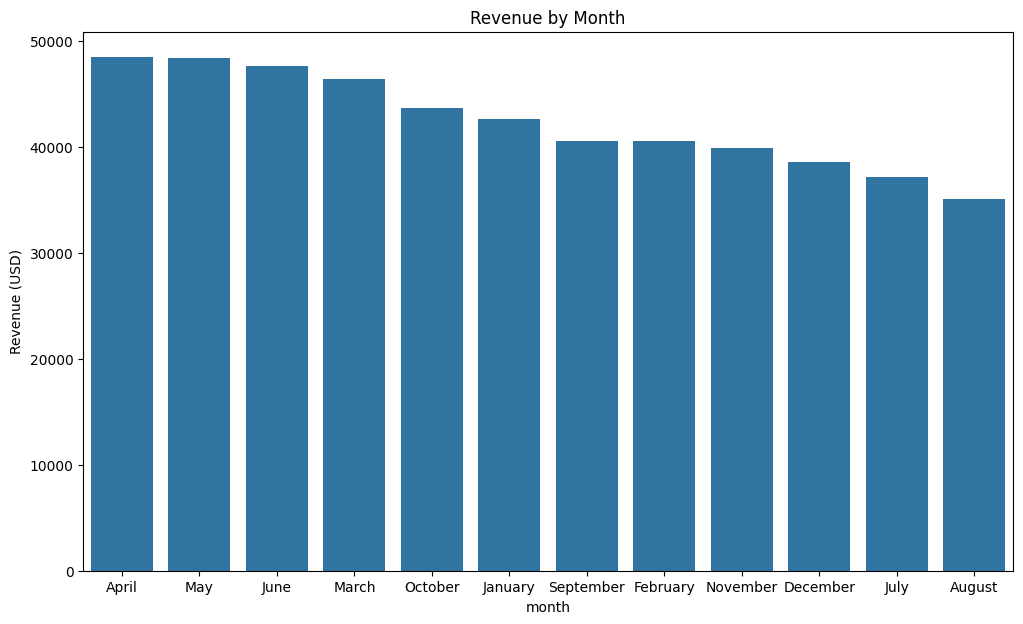

In [34]:
total_amount_per_month=total_amount_per_month.sort_values(by='fare_amount',ascending=False)
plt.figure(figsize=(12,7))
ax = sns.barplot(x='month',y='fare_amount',data=total_amount_per_month)
ax.set_ylabel("Revenue (USD)")
plt.title("Revenue by Month")


**hypothesis test for fare amount relationship with passenger count**

As above we have seen mean fare amount with passenger count which shows the same mean for all. so let's test wether they have a relationship or not.

In [35]:
from scipy import stats


In [36]:
df.describe()[['fare_amount','passenger_count']]


,fare_amount,passenger_count
count,44646.000000,44646.000000
mean,11.400171,1.678627
std,10.081187,1.295952
min,0.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,350.000000,6.000000


In [37]:
df.groupby('passenger_count')[['fare_amount']].mean()


,fare_amount
passenger_count,
0.0,9.856164
1.0,11.302371
2.0,11.796193
3.0,11.622678
4.0,11.891050
5.0,10.970196
6.0,12.565523


As we can see the values of passenger count and fare amount are consistent and we don't see any relationship, but it can be because of random sampling. To find wether these values are statistically significant, let's do some hypothesis testing.

**Hypothesis**

**Null Hypothesis:** There is no difference between average fare amount based on the no of passenger.

**Alternative Hypothesis**:There is difference between average fare amount based on the no of passenger.

In [38]:
one_passenger = df[df['passenger_count'] == 1]['fare_amount']
two_passenger = df[df['passenger_count'] == 2]['fare_amount']
three_passenger = df[df['passenger_count'] == 3]['fare_amount']
four_passenger = df[df['passenger_count'] == 4]['fare_amount']
five_passenger = df[df['passenger_count'] == 5]['fare_amount']
six_passenger = df[df['passenger_count'] == 6]['fare_amount']

In [39]:
result = stats.f_oneway(one_passenger,two_passenger,three_passenger,four_passenger,five_passenger,six_passenger)
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

F-statistic: 6.7923541796406015
p-value: 2.4362472811832708e-06


Since the p-value is less than significance level 0.05, so we reject the null hypothesis and conclude that there is a significant difference in the average fare amount based on the number of passengers.

**Linear regression model**

As we have removed missing values now let's analyze duplicates.

In [40]:
df1 = df.copy()
df1.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,May,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,July,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,August,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,June,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,4.475450,August,Thursday


In [41]:
df1.duplicated().sum()


0

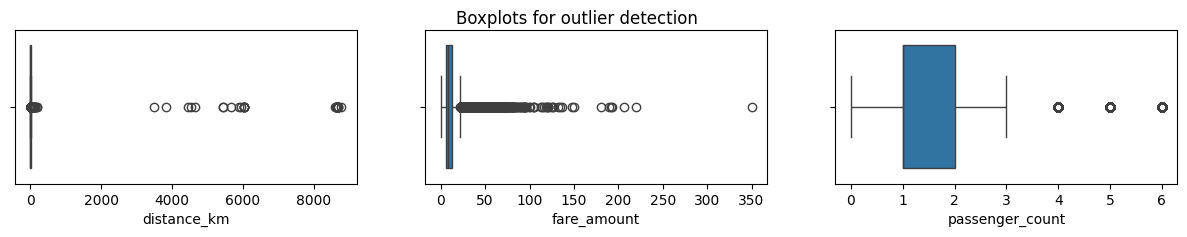

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df1['distance_km'])
sns.boxplot(ax=axes[1], x=df1['fare_amount'])
sns.boxplot(ax=axes[2], x=df1['passenger_count'])
plt.show();


In [43]:
sum(df1['distance_km']==0)


1220

In [44]:
df1['fare_amount'].describe()


,fare_amount
count,44646.000000
mean,11.400171
std,10.081187
min,0.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,350.000000


The min is -52 so we can make it 0 but the max is 499 which is unreal.



In [45]:
def outlier_imputer(df, column_list, iqr_factor):
    df_copy = df.copy()  # Work on a copy of the dataframe

    for col in column_list:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        lower_threshold = q1 - (iqr_factor * iqr)

        # Print statistics for debugging
        print(f"Column: {col}")
        print(f"Q1 (25th percentile): {q1}")
        print(f"Q3 (75th percentile): {q3}")
        print(f"Upper Threshold: {upper_threshold}")
        print(f"Lower Threshold: {lower_threshold}")

        # Filter out outliers
        df_copy = df_copy[(df_copy[col] <= upper_threshold) & (df_copy[col] >= lower_threshold)]

        # Print updated statistics
        print(f"Updated stats for {col}:")
        print(df_copy[col].describe())
        print()

    return df_copy


In [46]:
df1 = outlier_imputer(df1, ['fare_amount','distance_km','passenger_count'], 1.5)


Column: fare_amount
Q1 (25th percentile): 6.0
Q3 (75th percentile): 12.5
Upper Threshold: 22.25
Lower Threshold: -3.75
Updated stats for fare_amount:
count    40787.000000
mean         8.951515
std          4.154999
min          0.000000
25%          5.700000
50%          8.000000
75%         11.000000
max         22.100000
Name: fare_amount, dtype: float64

Column: distance_km
Q1 (25th percentile): 1.1674394257059708
Q3 (75th percentile): 3.2903966829912674
Upper Threshold: 6.474832568919212
Lower Threshold: -2.016996460221974
Updated stats for distance_km:
count    38951.000000
mean         2.225579
std          1.458476
min          0.000000
25%          1.135691
50%          1.878858
75%          3.039261
max          6.472027
Name: distance_km, dtype: float64

Column: passenger_count
Q1 (25th percentile): 1.0
Q3 (75th percentile): 2.0
Upper Threshold: 3.5
Lower Threshold: -0.5
Updated stats for passenger_count:
count    34664.000000
mean         1.263790
std          0.551319
min 

In [47]:
df1.shape


(34664, 11)

In [48]:
df1.columns


Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day'],
      dtype='object')

In [49]:
df1['day'] = df1['day'].str.lower()
df1['month'] = df1['pickup_datetime'].dt.strftime('%b').str.lower()

In [50]:
df1.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,may,thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,jul,friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,aug,monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,jun,friday
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,feb,saturday


In [51]:
df1['rush_hour'] = df1['pickup_datetime'].dt.hour


In [52]:
df1.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,may,thursday,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,jul,friday,20
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,aug,monday,21
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,jun,friday,8
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,feb,saturday,2


In [53]:
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0


In [54]:
df1['rush_hour'].value_counts()

,count
rush_hour,
0,10462
19,1700
18,1597
20,1569
21,1500
8,1425
22,1416
9,1361
12,1337


In [55]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [56]:
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1).astype('int32')

df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,may,thursday,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,jul,friday,0
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,aug,monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,jun,friday,1
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,feb,saturday,0


In [57]:
df1.columns


Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day', 'rush_hour'],
      dtype='object')

In [58]:
df2 = df1.drop(['Id', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','day', 'month'],axis=1)
df2.head()

,fare_amount,passenger_count,distance_km,rush_hour
0,7.5,1.0,1.683323,1
1,7.7,1.0,2.457590,0
2,12.9,1.0,5.036377,0
3,5.3,3.0,1.661683,1
5,4.9,1.0,0.000000,0


In [59]:
df2['rush_hour'] = df2['rush_hour'].astype(float)


In [60]:
df2.shape


(34664, 4)

In [61]:
df2 = df2[df2['distance_km']!=0].reindex()


In [62]:
df2.shape


(33691, 4)

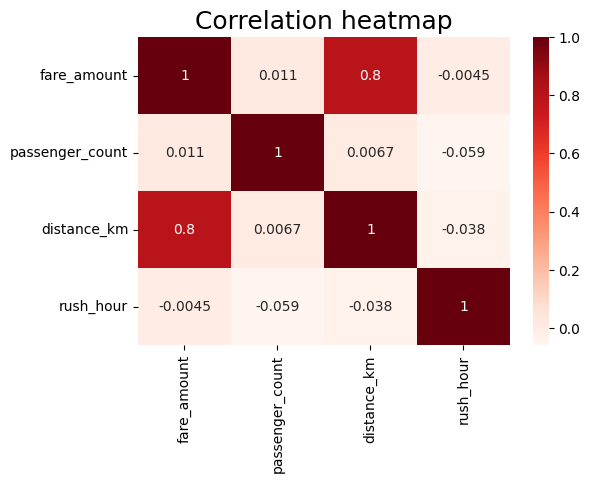

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

In [64]:
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

In [65]:
X.head()


,passenger_count,distance_km,rush_hour
0,1.0,1.683323,1.0
1,1.0,2.457590,0.0
2,1.0,5.036377,0.0
3,3.0,1.661683,1.0
8,1.0,2.332711,1.0


In [66]:
X[X['distance_km']==0].head()


,passenger_count,distance_km,rush_hour


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [69]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 1.33233854 -0.70789721  1.5686017 ]
 [ 3.14365705  1.71995636 -0.63751046]
 [-0.47897998  1.16496789  1.5686017 ]
 ...
 [-0.47897998 -0.53214595 -0.63751046]
 [-0.47897998 -0.56647633 -0.63751046]
 [-0.47897998 -0.47671894 -0.63751046]]


In [70]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:

r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.6317175255354939
R^2: 0.6317175255354939
MAE: 1.626032759161596
MSE: 5.152706549993746
RMSE: 2.2699573894665392


In [72]:
X_test_scaled = scaler.transform(X_test)


In [73]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.6476740229927953
R^2: 0.6476740229927953
MAE: 1.597331407031075
MSE: 4.903559998614201
RMSE: 2.214398337836759


In [74]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
199,14.1,16.884723,-2.784723
31639,12.5,8.728379,3.771621
35407,10.5,6.733363,3.766637
22871,10.5,8.698549,1.801451
43733,3.7,5.856836,-2.156836


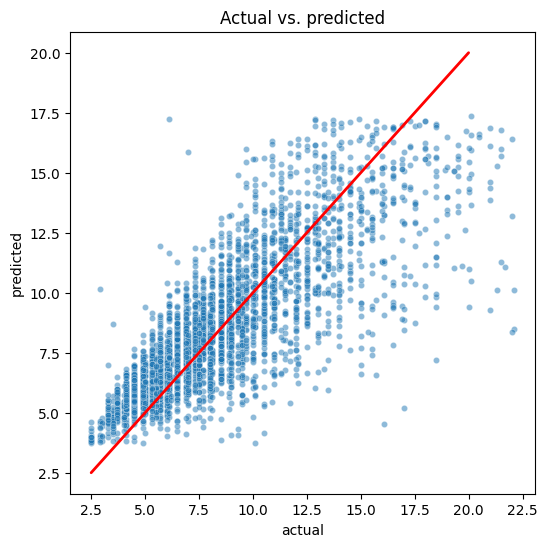

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([2.5,20], [2.5,20], c='red', linewidth=2)
plt.title('Actual vs. predicted');

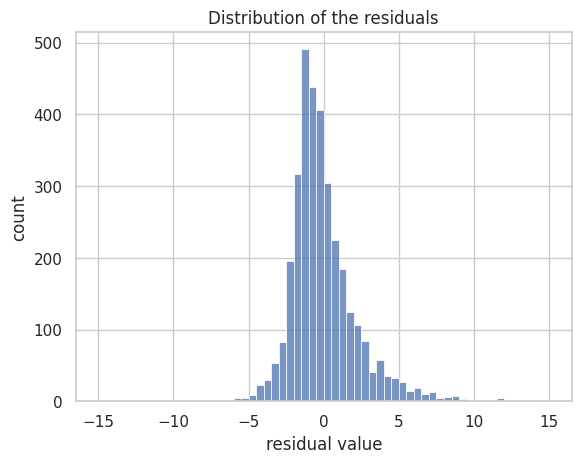

In [76]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [77]:
results['residual'].mean()


-0.03580485921227611

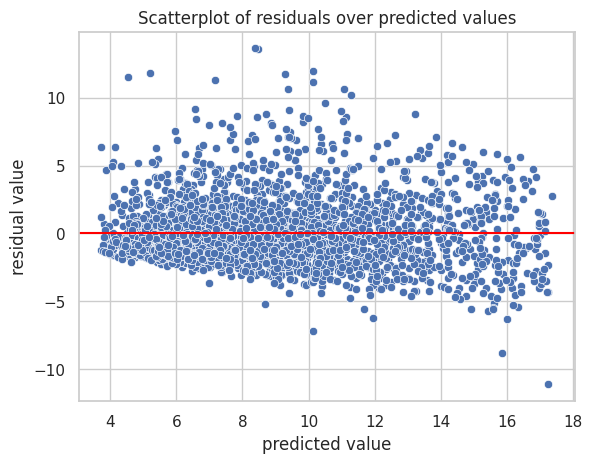

In [78]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [79]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,distance_km,rush_hour
0,0.026414,2.974748,0.098924


In [80]:
print(X_train['distance_km'].std())

# 2. Divide the model coefficient by the standard deviation
print(2.959849 / X_train['distance_km'].std())

1.4304276406090497
2.0692056808548185


Finding from the LR model

so according to the data for every 1.42 km traveled the fare increase by a mean of 2.95 or for every 1 km traveled the fare increased by a mean of 2.08 dollars.

**Training Model for prediction purpose**

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# This is the function that helps plot feature importance
from xgboost import plot_importance

In [82]:
df1.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,may,thursday,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,jul,friday,0
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,aug,monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,jun,friday,1
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,feb,saturday,0


In [83]:
# Create 'am_rush' col
df1['am_rush'] = df1['pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['pickup_datetime'].dt.hour

In [84]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [85]:
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

,am_rush
0,0
1,0
2,0
3,1
5,0


In [86]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [87]:
df1['daytime'] = df1.apply(daytime, axis=1)


In [88]:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [89]:
df1['pm_rush'] = df1.apply(pm_rush, axis=1)


In [90]:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [91]:
df1['nighttime'] = df1.apply(nighttime, axis=1)


In [92]:
df1.head()


,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour,am_rush,daytime,pm_rush,nighttime
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,may,thursday,1,0,0,1,0
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,jul,friday,0,0,0,0,1
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,aug,monday,0,0,0,0,1
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,jun,friday,1,1,0,0,0
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,feb,saturday,0,0,0,0,1


In [93]:
drop_columns = ['Id','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','rush_hour']
df1 = df1.drop(drop_columns,axis=1)
df1.head()

,fare_amount,passenger_count,distance_km,month,day,am_rush,daytime,pm_rush,nighttime
0,7.5,1.0,1.683323,may,thursday,0,0,1,0
1,7.7,1.0,2.457590,jul,friday,0,0,0,1
2,12.9,1.0,5.036377,aug,monday,0,0,0,1
3,5.3,3.0,1.661683,jun,friday,1,0,0,0
5,4.9,1.0,0.000000,feb,saturday,0,0,0,1


In [94]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34664 entries, 0 to 44644
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      34664 non-null  float64
 1   passenger_count  34664 non-null  float64
 2   distance_km      34664 non-null  float64
 3   am_rush          34664 non-null  int64  
 4   daytime          34664 non-null  int64  
 5   pm_rush          34664 non-null  int64  
 6   nighttime        34664 non-null  int64  
 7   month_aug        34664 non-null  bool   
 8   month_dec        34664 non-null  bool   
 9   month_feb        34664 non-null  bool   
 10  month_jan        34664 non-null  bool   
 11  month_jul        34664 non-null  bool   
 12  month_jun        34664 non-null  bool   
 13  month_mar        34664 non-null  bool   
 14  month_may        34664 non-null  bool   
 15  month_nov        34664 non-null  bool   
 16  month_oct        34664 non-null  bool   
 17  month_sep        

In [95]:
X = df1.drop(['fare_amount'],axis=1)
y = df1[['fare_amount']]

In [96]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [97]:
X_train.shape


(24264, 23)

In [98]:
y_train.shape


(24264, 1)

In [99]:
regressor = RandomForestRegressor(random_state=42)


In [100]:
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'r2','accuracy'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(regressor, cv_params, scoring=scoring, cv=4,refit='r2')

In [101]:
# rf1.fit(X_train, y_train.ravel())


In [102]:
# rf1.best_score_


In [103]:
# rf1.best_params_


In [104]:
random_forest = RandomForestRegressor(max_depth= None,
 max_features= 1.0,
 max_samples= 0.7,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators=300)

In [105]:
random_forest.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_samples=0.7, n_estimators=300)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the same data or new data
predictions = random_forest.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 5.946047404266631
R-squared: 0.5802271513723873


In [107]:
# 1. Instantiate the XGBoost
xgb = XGBRegressor(objective ='reg:squarederror',random_state=42, learning_rate = 0.02, max_depth = 8,min_child_weight= 4,
 n_estimators = 200)

In [108]:
y_train.shape


(24264, 1)

In [109]:
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [110]:
# Making predictions on the same data or new data
predictions = xgb.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 5.452088816465363
R-squared: 0.6150991241986761


In [115]:
result1 = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': predictions.ravel()})
result1['residual'] = result1['actual'] - result1['predicted']
result1.head()

,actual,predicted,residual
36808,17.0,14.572149,2.427851
18169,7.3,9.993526,-2.693526
21050,3.3,4.316397,-1.016397
7383,5.5,5.574350,-0.074350
3505,6.5,5.595074,0.904926


Text(0, 0.5, 'count')

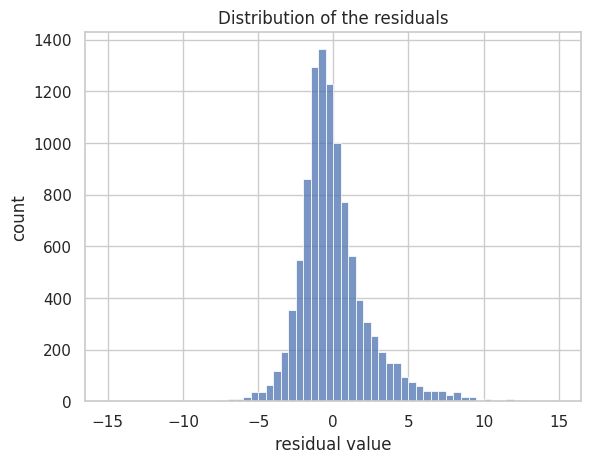

In [116]:
sns.histplot(result1['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')

In [117]:
result1['residual'].mean()

0.008107307185576519

In [111]:
import pickle

# Assuming 'model' is your trained model (e.g., RandomForestRegressor, etc.)
with open('xgb.pkl', 'wb') as file:
    pickle.dump((xgb), file)


In [112]:
with open('xgb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [113]:
predictions = loaded_model.predict(X_test)
print(predictions)

[14.572149   9.9935255  4.316397  ...  7.065133   5.8190746  5.716619 ]
